<a href="https://colab.research.google.com/github/s-c-soma/Deeplearning-CMPE-258/blob/main/Assignment_6/Assignment_6b2_CNN_based_Image_Classifier_Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CNN based image classifier Using Pytorch



## Implementation Details and Discussion

* This colab implements the CNN based clsssifier using Keras.

* Here I have followed the steps following :
> 1. I have used two different datasets. One is custom- Food image dataset and the Fashion MNIST dataset
> 2. Some preprocessing such as augmentation and standardization on datasets
> 3. Then I have build the networt to build CNN based classifier
> 4. Then I have trained the classifier model 
> 5. Finally I have done some prediction
> 6. After 5 epochs:
** With Food image Dataset:
>> loss: 0.5425 - accuracy: 0.8308 - val_loss: 0.4063 - val_accuracy: 0.8635
** With F MINST Dataset:
>> Loss:1.164, Accuracy:75.583, Testing Loss 0.001, Testing Accuracy:98.320



# Check if GPU/TPU available

In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Select the Runtime > "Change runtime type" menu to enable a GPU accelerator, ')
  print('and then re-execute this cell.')
else:
  print(gpu_info)

Sat May  1 05:35:12 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.19.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P0    26W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# import libraries

In [1]:
# load some default Python modules
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.datasets import mnist
from sklearn.metrics import mean_squared_error
import itertools
import math
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.datasets import fashion_mnist
from sklearn.metrics import mean_squared_error
import itertools
import math
from sklearn.metrics import confusion_matrix
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D
from tensorflow import keras
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.autograd import Variable
torch.cuda.is_available()
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping, TensorBoard
% matplotlib inline

plt.style.use('seaborn-whitegrid')

import warnings
warnings.filterwarnings('ignore')

# Load Data - Food and Grocery

In [ ]:
!curl -O https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  786M  100  786M    0     0   134M      0  0:00:05  0:00:05 --:--:--  136M


In [ ]:
!unzip -q kagglecatsanddogs_3367a.zip
!ls

 kagglecatsanddogs_3367a.zip   PetImages        sample_data
'MSR-LA - 3467.docx'	      'readme[1].txt'


In [ ]:
!ls PetImages

Cat  Dog


In [2]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

--2021-05-01 06:35:50--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.127.128, 172.217.218.128, 74.125.143.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.127.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   105MB/s    in 5.0s    

2021-05-01 06:35:56 (98.2 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [3]:
# Unzip the downloaded file
def unzip_data(filename):
  """
  Utility function to unzip a zipped file.
  """
  zip_ref = zipfile.ZipFile(filename, "r")
  zip_ref.extractall()
  zip_ref.close()

In [5]:
import zipfile
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

In [7]:
unzip_data("10_food_classes_all_data.zip")

In [9]:
!ls 10_food_classes_all_data

test  train


# Load Data- F-MNIST



In [28]:
mean_gray= 0.1307
stddev_gray= 0.3081
#normalize the image with std and mean
#e.g: input[channel]=(input[channel]-mean[channel])/std(channel)
transforms = transforms.Compose([transforms.ToTensor(), transforms.Normalize((mean_gray,),(stddev_gray,))])

train_dataset=datasets.MNIST(root='./data', train=True, transform=transforms, download=True)
test_dataset=datasets.MNIST(root='./data', train=False, transform=transforms)


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw




Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw




Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw




Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

Processing...
Done!


# Visualize the dataset

In [ ]:
image_size = (180, 180)
batch_size = 32

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "PetImages",
    validation_split=0.2,
    subset="training",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "PetImages",
    validation_split=0.2,
    subset="validation",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)

Found 23410 files belonging to 2 classes.
Using 18728 files for training.
Found 23410 files belonging to 2 classes.
Using 4682 files for validation.


label: 0


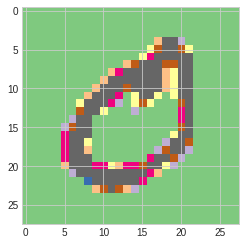

In [29]:
import matplotlib.pyplot as plt
label=train_dataset[21][1]
print('label:', label)
random_image = train_dataset[21][0].numpy() * stddev_gray + mean_gray
plt.imshow(random_image.reshape(28,28), cmap='Accent')

# Preprocessing

## Data Augmentation

In [10]:
# Setup data inputs
IMG_SIZE = (224, 224)

def create_data_loaders(train_dir, test_dir, image_size=IMG_SIZE):
  """
  Creates a training and test image BatchDataset from train_dir and test_dir.
  """
  train_data = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                  label_mode="categorical",
                                                                  image_size=image_size)
  # Note: the test data is the same as the previous experiment, we could
  # skip creating this, but we'll leave this here to practice.
  test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                  label_mode="categorical",
                                                                  image_size=image_size)
  
  return train_data, test_data

In [11]:
# Create a data augmentation stage with horizontal flipping, rotations, zooms
data_augmentation = keras.Sequential([
  preprocessing.RandomFlip("horizontal"),
  preprocessing.RandomRotation(0.2),
  preprocessing.RandomZoom(0.2),
  preprocessing.RandomHeight(0.2),
  preprocessing.RandomWidth(0.2),
  # preprocessing.Rescaling(1./255) # keep for ResNet50V2, remove for EfficientNetB0
], name ="data_augmentation")

## Standardize Image Dataset

# Train- Testing Split

In [19]:
# Create BatchDataset
train_data, test_data = create_data_loaders(train_dir="10_food_classes_all_data/train/",
                                            test_dir="10_food_classes_all_data/test/")

Found 7500 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [30]:
batch_size=100
epochs=5
train_load=torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_load=torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

# Network Build 

In [12]:
# Setup input shape and base model, freezing the base model layers
INPUT_SHAPE = (224, 224, 3)
BASE_MODEL = tf.keras.applications.EfficientNetB0(include_top=False)

def create_model(input_shape=INPUT_SHAPE, base_model=BASE_MODEL, num_classes=10):
  # Fine-tune?
  base_model.trainable = False

  # Create input layer
  inputs = layers.Input(shape=input_shape, name="input_layer")

  # Add in data augmentation Sequential model as a layer
  x = data_augmentation(inputs)

  # Give base_model inputs (after augmentation) and don't train it
  x = base_model(x, training=False)

  # Pool output features of base model
  x = layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)

  # Put a dense layer on as the output
  outputs = layers.Dense(num_classes, activation="softmax", name="output_layer")(x)

  # Make a model with inputs and outputs
  model = keras.Model(inputs, outputs)

  # Compile the model
  model.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
  
  return model

16711680/16705208 [==============================] - 0s 0us/step


In [14]:
# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224, scale=False):
  """
  Reads in an image from filename, turns it into a tensor and reshapes into
  (224, 224, 3).
  """
  # Read in the image
  img = tf.io.read_file(filename)
  # Decode it into a tensor
  img = tf.image.decode_jpeg(img)
  # Resize the image
  img = tf.image.resize(img, [img_shape, img_shape])
  # Rescale the image (get all values between 0 and 1)
  if scale:
    return img/255.
  else:
    return img

In [15]:
import os

# Walk through 10 percent data directory and list number of files
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/train'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_curry'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/hamburger'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/sushi'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ramen'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ice_cream'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/steak'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/pizza'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_wings'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/fried_rice'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/grilled_salmon'.

In [16]:
# Check the file in 10_food_classes_10_percent
!ls -la 10_food_classes_all_data

total 16
drwxr-xr-x  4 root root 4096 May  1 06:36 .
drwxr-xr-x  1 root root 4096 May  1 06:36 ..
drwxr-xr-x 12 root root 4096 May  1 06:36 test
drwxr-xr-x 12 root root 4096 May  1 06:36 train


In [17]:
import datetime
def create_tensorboard_callback(dir_name, experiment_name):
  log_dir = dir_name + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
  tensorboard_callback = tf.keras.callbacks.TensorBoard(
      log_dir=log_dir
  )
  print(f"Saving TensorBoard log files to: {log_dir}")
  return tensorboard_callback

In [18]:
# Create BatchDataset
train_data, test_data = create_data_loaders(train_dir="10_food_classes_all_data/train/",
                                            test_dir="10_food_classes_all_data/test/")

Found 7500 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [31]:
class CNN(nn.Module):
  def __init__(self):
    super(CNN, self).__init__()

    # Add layer 1  - CNN, BatchNorm, Relu, MaxPool
    self.layer1 = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
    )
      
    # Add layer 2 - CNN, BatchNorm, Relu, MaxPool
    self.layer2 = nn.Sequential(
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2)
    )
        
    # Add layer 3 - Linear, Dropout, Linear, Dropout
    self.fc1 = nn.Linear(in_features=64*6*6, out_features=600)
    self.drop = nn.Dropout2d(0.3)
    self.fc2 = nn.Linear(in_features=600, out_features=120)
    self.drop = nn.Dropout2d(0.3)

  def forward(self, x):
    out = self.layer1(x)
    out = self.layer2(out)
    out = out.view(out.size(0), -1)
    out = self.fc1(out)
    out = self.drop(out)
    out = self.fc2(out)
    out = self.drop(out)
    return out

In [32]:
learning_rate = 0.001
loss_fn=nn.CrossEntropyLoss()
#loss_fn = nn.L1Loss()
momemtum = 0.9

model=CNN()
CUDA=torch.cuda.is_available()
if CUDA:
  model=model.cuda()

#optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=momemtum)

In [33]:
iteration=0
correct_nodata=0
correct_data=0
for i,(inputs,labels) in enumerate (train_load):
  if iteration==1:
    break
  inputs=Variable(inputs)
  labels=Variable(labels)
  if torch.cuda.is_available():
    inputs=inputs.cuda()
    labels=labels.cuda()

  print("For 1 iteration, this is what happens:")
  print("Input Shape:",inputs.shape)
  print("Labels Shape:", labels.shape)
  output = model(inputs)
  
  print("Output Shape:",output.shape)
  _,predicted_nodata=torch.max(output,1)
  
  print("Predicted Shape:",predicted_nodata.shape)
  print("Predicted Tensor:",predicted_nodata)
  correct_nodata +=(predicted_nodata==labels).sum()
  print("Correct Predictions:",correct_nodata)
  _,predicted_data = torch.max(output.data,1)
  correct_data +=(predicted_data==labels.data).sum()
  
  print("Correct Predictions:",correct_data)
  
  iteration+=1

For 1 iteration, this is what happens:
Input Shape: torch.Size([100, 1, 28, 28])
Labels Shape: torch.Size([100])
Output Shape: torch.Size([100, 120])
Predicted Shape: torch.Size([100])
Predicted Tensor: tensor([ 83,  29,  51,  84,  40,  14,  69,  49,  97,  49,   8,  23,  23,  49,
         59,  97,  26,  29, 105,  19,  97, 105,  50, 105,  12, 102,  20,  49,
         59,  23,  38,  50,  97,  50,  38,  97,  29,  43,  38,  84,  12,  51,
         29,  26,  29,   8, 102,  29,  67,  95, 105,  97,  50, 102, 105,  38,
         38,  20,  12,  33,  43,  24, 102,  59,  50,  97,  23,  87, 105,  23,
         97,   8,  38,  84,  47, 102, 105,  30,  59,  29, 102,  47,  49,  12,
         38,  12, 105,  23,  59,  97,  97,  18, 112, 107,  23,  50, 105,  30,
         38, 105], device='cuda:0')
Correct Predictions: tensor(0, device='cuda:0')
Correct Predictions: tensor(0, device='cuda:0')


# Model Fit and Prediction

In [20]:
# Create model
model_1 = create_model(num_classes=len(train_data.class_names))

# Fit the model
history_1_percent = model_1.fit(train_data,
                    epochs=5,
                    steps_per_epoch=len(train_data),
                    validation_data=test_data,
                    validation_steps=int(0.25 * len(test_data)), # validate for less steps
                    # Track model training logs
                    callbacks=[create_tensorboard_callback("transfer_learning", "all_data_aug")])

Saving TensorBoard log files to: transfer_learning/all_data_aug/20210501-064037
Epoch 1/5
235/235 [==============================] - 68s 199ms/step - loss: 1.4339 - accuracy: 0.5458 - val_loss: 0.5493 - val_accuracy: 0.8339
Epoch 2/5
235/235 [==============================] - 38s 159ms/step - loss: 0.7201 - accuracy: 0.7867 - val_loss: 0.4588 - val_accuracy: 0.8405
Epoch 3/5
235/235 [==============================] - 36s 149ms/step - loss: 0.6345 - accuracy: 0.8031 - val_loss: 0.4122 - val_accuracy: 0.8635
Epoch 4/5
235/235 [==============================] - 33s 138ms/step - loss: 0.5755 - accuracy: 0.8237 - val_loss: 0.4203 - val_accuracy: 0.8734
Epoch 5/5
235/235 [==============================] - 33s 136ms/step - loss: 0.5425 - accuracy: 0.8308 - val_loss: 0.4063 - val_accuracy: 0.8635


In [21]:
# Get an image Tensor
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg

--2021-05-01 06:44:05--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.09s   

2021-05-01 06:44:05 (29.9 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]



In [22]:
# Classes our model is trained on
class_names = train_data.class_names
class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [23]:
pizza_img = load_and_prep_image("03-pizza-dad.jpeg")
#print(pizza_img)

In [34]:
num_epochs=5

train_loss=[]
test_loss=[]
train_accuracy=[]
test_accuracy=[]

# Training
for epoch in range(num_epochs):
  # Reset variables at 0 epoch
  correct=0
  iteration=0
  iter_loss=0.0
  
  model.train() # Training Mode
  
  for i,(inputs,labels) in enumerate(train_load):
    
    inputs=Variable(inputs)
    labels=Variable(labels)
    
    # if CUDA is avaible, shift to GPU (CUDA)
    CUDA=torch.cuda.is_available()
    if CUDA:
      inputs=inputs.cuda()
      labels=labels.cuda()
      
    optimizer.zero_grad() # clear gradient
    outputs=model(inputs)
    loss=loss_fn(outputs,labels)
    iter_loss += loss.item() # Accumulate loss
    loss.backward() # backpropagation
    optimizer.step() # update weights
    
    # Save the correct predictions for training data
    _,predicted=torch.max(outputs,1)
    correct +=(predicted==labels).sum()
    iteration +=1
    
  train_loss.append(iter_loss/iteration)
  train_accuracy.append((100*correct/len(train_dataset)))
  
  # Testing
  correct=0
  iteration=0
  loss=0.0
  
  model.eval()  # Testing Mode
  
  for i, (inputs, labels) in enumerate(test_load):
    
    inputs=Variable(inputs)
    labels=Variable(labels)
    
    CUDA=torch.cuda.is_available()
    if CUDA:
      inputs=inputs.cuda()
      labels=labels.cuda()
    
    outputs=model(inputs)
    loss=loss_fn(outputs,labels)
    loss += loss.item()
    
    _,predicted=torch.max(outputs,1)
    correct+=(predicted==labels).sum()
    
    iteration+=1
    
  test_loss.append(loss/iteration)
  test_accuracy.append((100*correct/len(test_dataset)))
  
  print('Epoch {}/{}, Training Loss:{:.3f}, Training Accuracy:{:.3f}, Testing Loss {:.3f}, Testing Accuracy:{:.3f}'
       .format(epoch+1, num_epochs, train_loss[-1], train_accuracy[-1], test_loss[-1], test_accuracy[-1]))
  
    

Epoch 1/5, Training Loss:1.553, Training Accuracy:65.440, Testing Loss 0.004, Testing Accuracy:96.870
Epoch 2/5, Training Loss:1.252, Training Accuracy:72.138, Testing Loss 0.002, Testing Accuracy:97.800
Epoch 3/5, Training Loss:1.218, Training Accuracy:73.707, Testing Loss 0.001, Testing Accuracy:98.130
Epoch 4/5, Training Loss:1.202, Training Accuracy:74.667, Testing Loss 0.001, Testing Accuracy:98.390
Epoch 5/5, Training Loss:1.164, Training Accuracy:75.583, Testing Loss 0.001, Testing Accuracy:98.320


# Prediction Using Food Classification and F-MNIST

In [25]:
# Make predictions
pizza_expanded = tf.expand_dims(pizza_img, axis=0) # expand image dimensions (224, 224, 3) -> (1, 224, 224, 3)
pred = model_1.predict(pizza_expanded)
pred

# Check the predicted class
class_names[tf.argmax(pred[0])]

'pizza'

In [26]:
import matplotlib.pyplot as plt

def pred_and_plot(model, image, class_names):
  pred_probs = model.predict(tf.expand_dims(image, axis=0))
  pred_class = class_names[tf.argmax(pred_probs[0])]
  
  plt.figure()
  plt.imshow(image)
  # plt.imshow(tf.argmax(pred[0]).astype("uint8"))
  plt.title(f"{pred_class}, prob: {tf.reduce_max(pred_probs):.2f}")
  plt.axis(False);

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


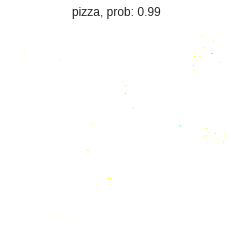

In [27]:
pred_and_plot(model=model_1,
              image=pizza_img,
              class_names=train_data.class_names)

In [35]:
img= test_dataset[40][0].resize_((1,1,28,28))
img= Variable(img)
label= test_dataset[40][1]

model.eval()

if torch.cuda.is_available():
  model=model.cuda()
  img=img.cuda()
  
output=model(img)
print(output)
print(output.data)
_,predicted=torch.max(output,1)
print("Prediction is:",predicted.item())
print("Actual is:", label)

tensor([[-3.7122,  5.5254, -2.2491, -2.3398, -1.6524,  0.2187, -3.4267, -1.0661,
         -1.6944, -2.2157, -2.7823, -2.9066, -2.8916, -2.7400, -3.3532, -3.0447,
         -2.9924, -2.8998, -2.7451, -3.1579, -3.0148, -3.0517, -2.8470, -2.8732,
         -2.9059, -3.1388, -2.7540, -3.1031, -3.1482, -2.6695, -2.8481, -2.9252,
         -2.7696, -3.1276, -2.8307, -2.8017, -2.7167, -2.9052, -3.3985, -3.5138,
         -2.9984, -2.8350, -3.3079, -2.8198, -3.2921, -3.3689, -3.1845, -3.1144,
         -2.9745, -2.7959, -2.6419, -2.8326, -2.9985, -3.3133, -3.1727, -3.2065,
         -3.1185, -3.1455, -3.1889, -2.4823, -2.8673, -3.4499, -3.0540, -2.9368,
         -2.9965, -2.8788, -2.7843, -2.9137, -3.1776, -3.0581, -2.7031, -3.2851,
         -2.8987, -3.2012, -3.2791, -2.9078, -3.1375, -3.2142, -2.9003, -3.2820,
         -2.6791, -2.6927, -3.0134, -3.4300, -3.1713, -3.0076, -2.9374, -3.1393,
         -2.6667, -3.0701, -3.1550, -3.0485, -3.0573, -3.0816, -3.0197, -3.0714,
         -2.9343, -3.1690, -

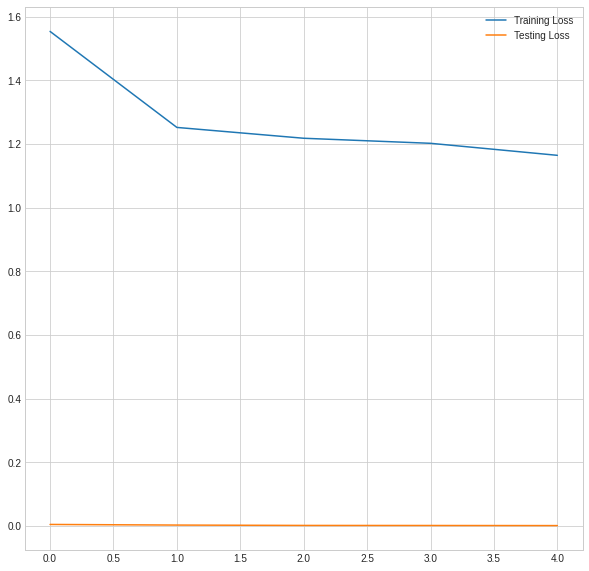

In [37]:
# Plot the loss
f=plt.figure(figsize=(10,10))
plt.plot(train_loss, label='Training Loss')
plt.plot(test_loss, label='Testing Loss')
plt.legend()
plt.show()